In [1]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=False)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [46]:
# parameter 
learning_rate = 0.01
epoches = 2000
batch_size = 128
display_step = 100

# layer parameter
n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
n_output = 10

### Estimator 를 이용한 train
1. input_fn 정의
  - tf.estimator.inputs.num_input_fn(x, y, batch_size)
2. model 구조 정의
  - tf.layers.dense()
3. model_fn 정의
  - tf.estimator.EstimatorSpec(mode, prediction, loss, train_op, eval_metric_ops)
4. run
  - model = tf.estimator.Estimator(model_fn)
  - model.train(input_fn, steps = epoches)
5. evaluate
  - input_fn : test 
  - model.evaluate(input_fn)
6. predict
  - input_fn : test
  - model.predict(input_fn)

In [47]:
# define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(x = {'images': mnist.train.images}, y=mnist.train.labels, batch_size=batch_size, num_epochs=None, shuffle=True)

In [48]:
#model
def neural_network(x_dict):
    x = x_dict['images']
    
    layer_1 = tf.layers.dense(x, n_hidden_1)
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    out_layer = tf.layers.dense(layer_2, n_output)
    
    return out_layer

In [49]:
def model_fn(features, labels, mode):
    logits = neural_network(features)
    
    # predict
    pred_classes = tf.argmax(logits, axis = 1)
    pred_prob = tf.nn.softmax(logits)
    
    # 
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions = pred_classes)
    
    # define loss
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels = tf.cast(labels, dtype = tf.int32)))
    
    # define optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    train_op = optimizer.minimize(loss_op, global_step = tf.train.get_global_step())
    
    # evaluate accuracy
    acc_op = tf.metrics.accuracy(labels = labels, predictions = pred_classes)
    
    # TF estimator template
    estim_specs = tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = pred_classes,
        loss = loss_op,
        train_op = train_op,
        eval_metric_ops={'accuracy' : acc_op}
    )
    
    return estim_specs

### Run

In [50]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\MAGENT~1\\AppData\\Local\\Temp\\tmp8agui4io', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017A8FBA5D68>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
# train
model.train(input_fn, steps=epoches)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\MAGENT~1\AppData\Local\Temp\tmp8agui4io\model.ckpt.
INFO:tensorflow:loss = 2.35277, step = 1
INFO:tensorflow:global_step/sec: 126.743
INFO:tensorflow:loss = 0.304955, step = 101 (0.794 sec)
INFO:tensorflow:global_step/sec: 125.392
INFO:tensorflow:loss = 0.4435, step = 201 (0.797 sec)
INFO:tensorflow:global_step/sec: 114.547
INFO:tensorflow:loss = 0.59468, step = 301 (0.872 sec)
INFO:tensorflow:global_step/sec: 96.8056
INFO:tensorflow:loss = 0.225904, step = 401 (1.032 sec)
INFO:tensorflow:global_step/sec: 111.049
INFO:tensorflow:loss = 0.366937, step = 501 (0.904 sec)
INFO:tensorflow:global_step/sec: 118.064
INFO:tensorflow:loss = 0.296542, step = 601 (0.844 sec)
INFO:tensorflow:global_step/sec: 108.895
INFO:tensorflow:loss = 0.453189, step = 701 (0.918 sec)
INFO:tensorflow:global_step/sec: 111.358
INFO:tensorflow:loss = 0.435572, step = 801 (0.898 sec)
INFO:tensorflow:global_step/sec: 12

### test

In [52]:
input_fn = tf.estimator.inputs.numpy_input_fn(x = {'images' : mnist.test.images}, y = mnist.test.labels, batch_size = batch_size, shuffle = False)

In [53]:
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2018-05-13-02:56:34
INFO:tensorflow:Restoring parameters from C:\Users\MAGENT~1\AppData\Local\Temp\tmp8agui4io\model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2018-05-13-02:56:35
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.8994, global_step = 2000, loss = 0.374029


{'accuracy': 0.8994, 'global_step': 2000, 'loss': 0.37402892}

INFO:tensorflow:Restoring parameters from C:\Users\MAGENT~1\AppData\Local\Temp\tmp8agui4io\model.ckpt-2000


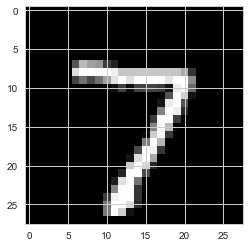

Model prediction: 7


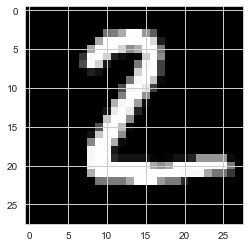

Model prediction: 2


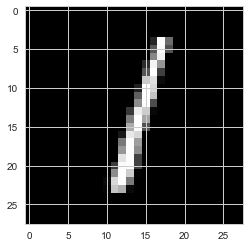

Model prediction: 1


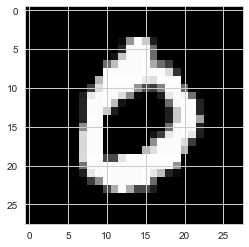

Model prediction: 0


In [54]:
# Predict single images
n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])